[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kotorkovsciy/Telegram-wakatime-stats-bot/blob/main/infographics/infographics.ipynb)

In [ ]:
!pip install requests pandas matplotlib pillow

In [2]:
import matplotlib.pyplot as plt
from io import BytesIO
import pandas as pd
import math
from requests import get
from PIL import Image
from io import BytesIO

In [3]:
class Convertation:
    @staticmethod
    def json_to_dataframe(json: dict) -> pd.DataFrame:
        """Convert json to dataframe

        Args:
            json (dict): Json

        Returns:
            pd.DataFrame: Dataframe
        """
        data = {"date": json["date"]}

        for i in json["stats"]:
            data[i["name"]] = i["total_seconds"]

        df = pd.DataFrame([data])

        return df

    @classmethod
    def list_json_to_dataframe(cls, list_json: list[dict]) -> pd.DataFrame:
        """Convert list json to dataframe

        Args:
            list_json (list[dict]): List json

        Returns:
            pd.DataFrame: Dataframe
        """
        df = pd.DataFrame()
        for json in list_json:
            df = pd.concat([df, cls.json_to_dataframe(json)], ignore_index=True)

        return df

    @staticmethod
    def num_to_percent(df: pd.DataFrame) -> pd.DataFrame:
        """Convert numbers to percent

        Args:
            df (pd.DataFrame): Dataframe

        Returns:
            pd.DataFrame: Dataframe
        """
        new_df = pd.DataFrame()

        for index, row in df.iterrows():
            data = {}
            sum = 0
            for i in row.items():
                if i[0] != "date":
                    if not math.isnan(i[1]):
                        sum += float(i[1])
                    else:
                        sum += 0

            for i in row.items():
                if i[0] != "date":
                    if not math.isnan(i[1]):
                        data[i[0]] = float(i[1]) / sum * 100
                    else:
                        data[i[0]] = 0
                else:
                    data[i[0]] = i[1]

            new_df = pd.concat([new_df, pd.DataFrame([data])], ignore_index=True)

        return new_df

In [4]:
class Visualization:
    @classmethod
    def create_pie_diagram(cls, data: list[dict]) -> bytes:
        """Create pie diagram

        Args:
            data (list[dict]): Data

        Returns:
            bytes: Image
        """

        if len(data) > 15:
            data = cls.filter_data_for_pie_diagram(data, 1)

        data_names, data_val = [], []


        for i in data:
            data_val.append(i["total_seconds"])
            data_names.append(i["name"])

        total = sum(data_val)
        labels = [f"{n} ({v/total:.1%})" for n,v in zip(data_names, data_val)]

        dpi = 80
        fig = plt.figure(dpi = dpi, figsize = (1000 / dpi, 600 / dpi) )

        plt.pie(
            data_val, radius=1.1,
            explode=[0.15] + [0 for _ in range(len(data_names) - 1)] )
        plt.legend(
            bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
            loc = 'best', labels = labels )

        buffer = BytesIO()
        fig.savefig(buffer, format="png")
        buffer.seek(0)

        img = buffer.getvalue()

        buffer.close()

        return img

    @staticmethod
    def filter_data_for_pie_diagram(data: list[dict], percent: int) -> list[dict]:
        """Filter data for pie diagram

        Args:
            data (list[dict]): Data
            percent (int): Percent

        Returns:
            list[dict]: Data
        """

        total = sum([i["total_seconds"] for i in data])
        data = [i for i in data if i["total_seconds"] / total * 100 > percent]

        return data

    def create_bar_diagram(data: list[dict]) -> bytes:
        """Create bar diagram

        Args:
            data (list[dict]): Data

        Returns:
            bytes: Image
        """
        df = Convertation.list_json_to_dataframe(data)
        df = Convertation.num_to_percent(df)
        df.plot(x="date", linestyle="-.", marker="s")

        buffer = BytesIO()
        plt.savefig(buffer, format="png")
        buffer.seek(0)

        img = buffer.getvalue()

        buffer.close()

        return img

    def create_bar_diagram_slice(
        data: list[dict], start: int = 0, end: int = 5
    ) -> bytes:
        """Create bar diagram slice

        Args:
            data (list[dict]): Data
            start (int, optional): Start. Defaults to 0.
            end (int, optional): End. Defaults to 5.

        Returns:
            bytes: Image
        """
        df = Convertation.list_json_to_dataframe(data)
        df = Convertation.num_to_percent(df)

        df2 = pd.DataFrame(df.mean(numeric_only=True)[start:end])
        df.plot(x="date", y=df2.index, linestyle="-.", marker="s")

        buffer = BytesIO()
        plt.savefig(buffer, format="png")
        buffer.seek(0)

        img = buffer.getvalue()

        buffer.close()

        return img

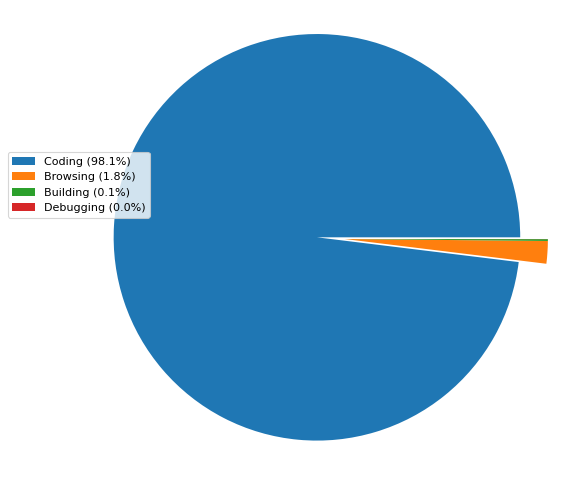

In [5]:
data_categories_for_pie_chart = get(
    "https://raw.githubusercontent.com/kotorkovsciy/Telegram-wakatime-stats-bot/main/infographics/data/data_categories_for_pie_chart.json"
).json()["categories"]
image_data = Visualization.create_pie_diagram(data_categories_for_pie_chart)
image = Image.open(BytesIO(image_data))
image.show()

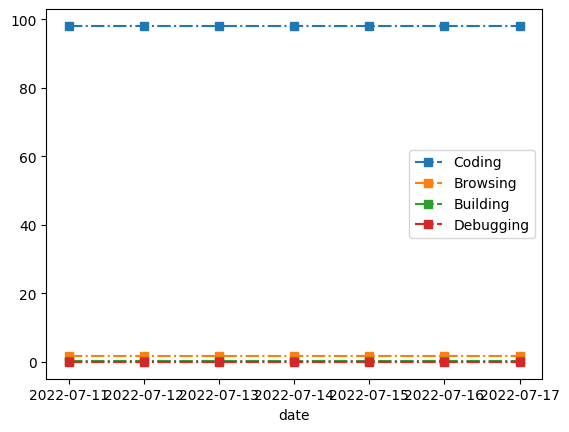

In [6]:
data_categories_for_bar_chart = get(
    "https://raw.githubusercontent.com/kotorkovsciy/Telegram-wakatime-stats-bot/main/infographics/data/data_categories_for_bar_chart.json"
).json()["data"]
image_data = Visualization.create_bar_diagram(data_categories_for_bar_chart)
image = Image.open(BytesIO(image_data))
image.show()

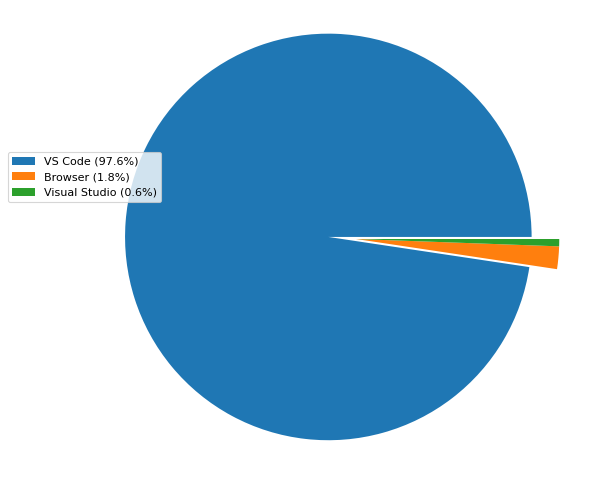

In [7]:
data_editors_for_pie_chart = get(
    "https://raw.githubusercontent.com/kotorkovsciy/Telegram-wakatime-stats-bot/main/infographics/data/data_editors_for_pie_chart.json"
).json()["editors"]
image_data = Visualization.create_pie_diagram(data_editors_for_pie_chart)
image = Image.open(BytesIO(image_data))
image.show()


(xviewer:273742): XVIEWER-CRITICAL **: 10:36:49.439: xviewer_list_store_get_pos_by_image: assertion 'XVIEWER_IS_IMAGE (image)' failed

(xviewer:273742): GLib-GObject-CRITICAL **: 10:36:49.472: g_object_unref: assertion 'G_IS_OBJECT (object)' failed


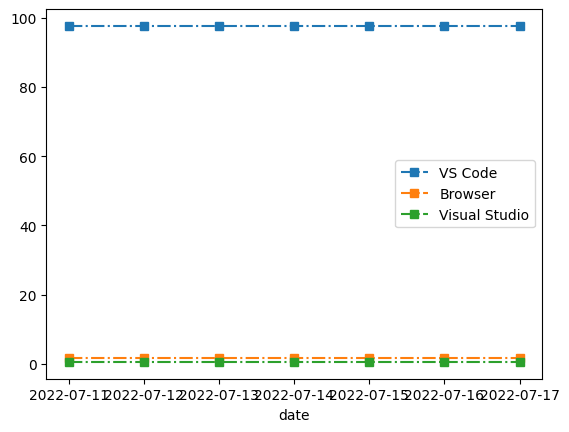

In [8]:
data_editors_for_bar_chart = get(
    "https://raw.githubusercontent.com/kotorkovsciy/Telegram-wakatime-stats-bot/main/infographics/data/data_editors_for_bar_chart.json"
).json()["data"]
image_data = Visualization.create_bar_diagram(data_editors_for_bar_chart)
image = Image.open(BytesIO(image_data))
image.show()


** (gdk-pixbuf-thumbnailer:273802): WARNING **: 10:36:50.345: Could not thumbnail 'file:///tmp/imageio16876577049916825842.tmp': Failed to open file ?/tmp/imageio16876577049916825842.tmp?: No such file or directory

(xviewer:273742): CinnamonDesktop-WARNING **: 10:36:50.347: Unable to create an input stream for file:///tmp/imageio16876577049916825842.tmp: Error opening file /tmp/imageio16876577049916825842.tmp: No such file or directory

(xviewer:273742): GLib-GObject-CRITICAL **: 10:36:50.348: g_object_unref: assertion 'G_IS_OBJECT (object)' failed


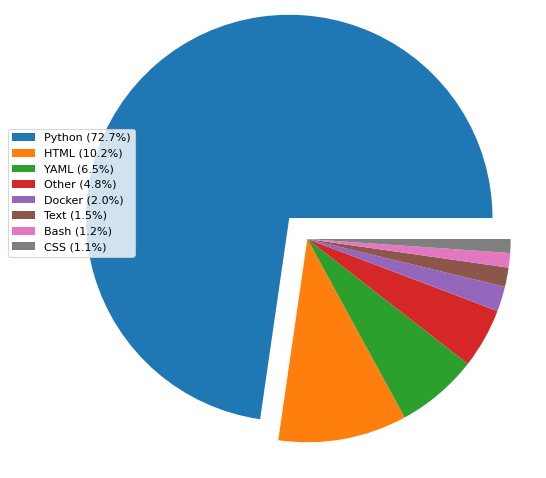

In [9]:
data_languages_for_pie_chart = get(
    "https://raw.githubusercontent.com/kotorkovsciy/Telegram-wakatime-stats-bot/main/infographics/data/data_languages_for_pie_chart.json"
).json()["languages"]
image_data = Visualization.create_pie_diagram(data_languages_for_pie_chart)
image = Image.open(BytesIO(image_data))
image.show()


** (gdk-pixbuf-thumbnailer:273820): WARNING **: 10:36:51.450: Could not thumbnail 'file:///tmp/imageio2483153628753983122.tmp': Failed to open file ?/tmp/imageio2483153628753983122.tmp?: No such file or directory

(xviewer:273742): CinnamonDesktop-WARNING **: 10:36:51.452: Unable to create an input stream for file:///tmp/imageio2483153628753983122.tmp: Error opening file /tmp/imageio2483153628753983122.tmp: No such file or directory

(xviewer:273742): GLib-GObject-CRITICAL **: 10:36:51.453: g_object_unref: assertion 'G_IS_OBJECT (object)' failed

(xviewer:273742): GLib-GObject-CRITICAL **: 10:36:51.453: g_object_unref: assertion 'G_IS_OBJECT (object)' failed


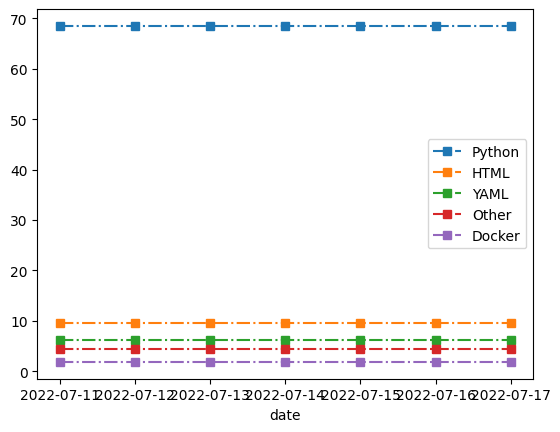

In [10]:
data_languages_for_bar_chart = get(
    "https://raw.githubusercontent.com/kotorkovsciy/Telegram-wakatime-stats-bot/main/infographics/data/data_languages_for_bar_chart.json"
).json()["data"]
image_data = Visualization.create_bar_diagram_slice(data_languages_for_bar_chart)
image = Image.open(BytesIO(image_data))
image.show()


** (gdk-pixbuf-thumbnailer:273838): WARNING **: 10:36:52.439: Could not thumbnail 'file:///tmp/imageio3531012161485543521.tmp': Failed to open file ?/tmp/imageio3531012161485543521.tmp?: No such file or directory

(xviewer:273742): CinnamonDesktop-WARNING **: 10:36:52.444: Unable to create an input stream for file:///tmp/imageio3531012161485543521.tmp: Error opening file /tmp/imageio3531012161485543521.tmp: No such file or directory

(xviewer:273742): GLib-GObject-CRITICAL **: 10:36:52.444: g_object_unref: assertion 'G_IS_OBJECT (object)' failed


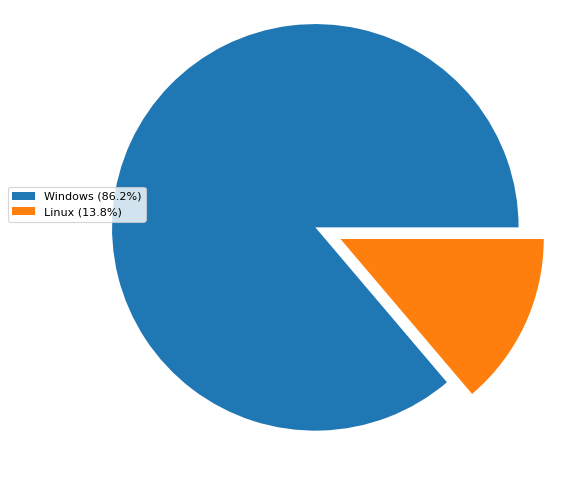

In [11]:
data_operating_systems_for_pie_chart = get(
    "https://raw.githubusercontent.com/kotorkovsciy/Telegram-wakatime-stats-bot/main/infographics/data/data_operating_systems_for_pie_chart.json"
).json()["operating_systems"]
image_data = Visualization.create_pie_diagram(data_operating_systems_for_pie_chart)
image = Image.open(BytesIO(image_data))
image.show()

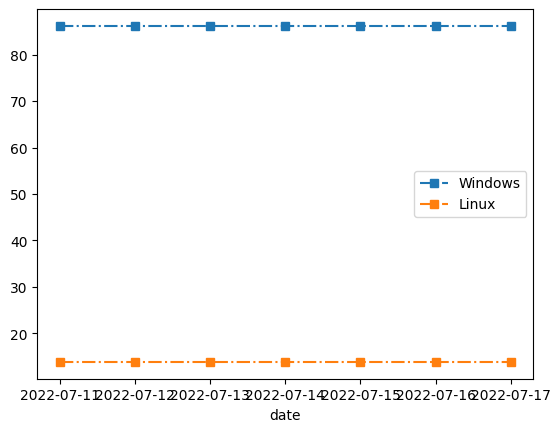

In [12]:
data_operating_systems_for_bar_chart = get(
    "https://raw.githubusercontent.com/kotorkovsciy/Telegram-wakatime-stats-bot/main/infographics/data/data_operating_systems_for_bar_chart.json"
).json()["data"]
image_data = Visualization.create_bar_diagram(data_operating_systems_for_bar_chart)
image = Image.open(BytesIO(image_data))
image.show()